Pablo Corrêa Fonseca

In [64]:
%matplotlib inline
import statsmodels.api as sm
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

**1. Importe para o R os dados do arquivo “dados_ 01.csv” e converta as variáveis acima
para séries de tempo usando o comando “ts”**

In [2]:
#carrega os dados e ajusta o index para períodos mensais
data = pd.read_csv('dados_01.csv',sep=';', decimal=',', index_col=0)
data.index = pd.to_datetime(dict(year=data.index.map(int), month=((data.index*100).map(int) % 100), day=1))
data = data.to_period('M')
data.head()

,SELIC,UTCAP,INF,EXPINF
2003-01,25.0,80.4,2.25,11.72
2003-02,25.5,80.2,1.57,11.07
2003-03,26.5,79.7,1.23,9.90
2003-04,26.5,79.7,0.97,9.18
2003-05,26.5,79.9,0.61,8.23


**Selecione a ordem de defasagens ótima de um modelo VAR para estas variáveis, com
base nos Critérios de Informação de Akaike, Schwarz e Hannan-Quinn, bem como no
teste de Razão de Verossimilhança (RV), considerando um máximo possível de 12
defasagens. As rotinas VARselect, do pacote vars, e VARorder, do pacote MTS,
fornecem os CIs, mas somente a segunda rotina realiza o teste de RV. [Para este
comando, supondo que a matriz de dados do VAR seja y, a sintaxe é:
VARorder(y,lag.max=12) ].**

In [3]:
#cria o modelo VAR
model = sm.tsa.VAR(data)
model.select_order()

                 VAR Order Selection                  
            aic          bic          fpe         hqic
------------------------------------------------------
0        0.3740       0.4509        1.454       0.4052
1        -9.933      -9.548*    4.856e-05      -9.777*
2        -10.02       -9.331    4.439e-05       -9.742
3        -10.02       -9.016    4.476e-05       -9.610
4        -10.24       -8.931    3.589e-05       -9.708
5       -10.24*       -8.629   3.581e-05*       -9.588
6        -10.20       -8.274    3.770e-05       -9.416
7        -10.20       -7.973    3.767e-05       -9.298
8        -10.22       -7.686    3.720e-05       -9.193
9        -10.19       -7.341    3.903e-05       -9.030
10       -10.22       -7.069    3.813e-05       -8.941
11       -10.14       -6.679    4.209e-05       -8.733
12       -10.05       -6.281    4.691e-05       -8.519
13       -9.966       -5.892    5.209e-05       -8.312
14       -9.899       -5.517    5.722e-05       -8.120
* Minimum


{'aic': 5, 'bic': 1, 'fpe': 5, 'hqic': 1}

**Verifique a presença de autocorrelação residual com base nos testes Portmanteau (6 e
12 defasagens) e LM de Breusch-Godfrey (até 4 defasagens).**

In [4]:
#diferente do R,o pacote statsmodels não possui o teste Portmanteau multivariavel
#o codigo abaixo reporta o p-valor do teste ljungbox para cada variável em separado, até 12 lags.
fit6 = model.fit(maxlags=5)
for col in fit6.resid.columns:
    print(col,sm.stats.diagnostic.acorr_ljungbox(fit6.resid[col], lags=12, boxpierce=False)[1],'\n')

SELIC [ 0.56320587  0.80680051  0.66572639  0.73851806  0.80107481  0.30428484
  0.27170086  0.35812398  0.42931385  0.51820299  0.24941299  0.27612047] 

UTCAP [ 0.8488243   0.90053504  0.93180308  0.90809154  0.81941048  0.86101208
  0.9186195   0.95380236  0.87479008  0.75917631  0.80716363  0.63251075] 

INF [ 0.86089954  0.73830308  0.8948515   0.86953052  0.86764958  0.76847227
  0.51459747  0.44979975  0.54285487  0.50139496  0.54621717  0.63080747] 

EXPINF [ 0.79188065  0.96528168  0.97748512  0.96155851  0.94961337  0.9660936
  0.98549924  0.97206745  0.96079981  0.7039296   0.51185726  0.52814901] 



In [5]:
#No entanto, o teste mutlivariável presente no pacote statmodels é o Durbin Watson
from statsmodels.stats.stattools import durbin_watson
durbin_watson(fit6.resid)

array([ 2.07492304,  2.00993869,  1.95786267,  1.97159805])

Durbin-Watson statistics
>The null hypothesis of the test is that there is no serial correlation. The Durbin-Watson test statistics is defined as:
>
>$$\frac{\sum_{t=2}^T((e_t - e_{t-1})^2)}{\sum_{t=1}^Te_t^2}$$
>
>The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. Thus, for r == 0, >indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial >correlation.

Com base nos resultados anteriores, escolha o melhor modelo VAR para as variáveis analisadas.

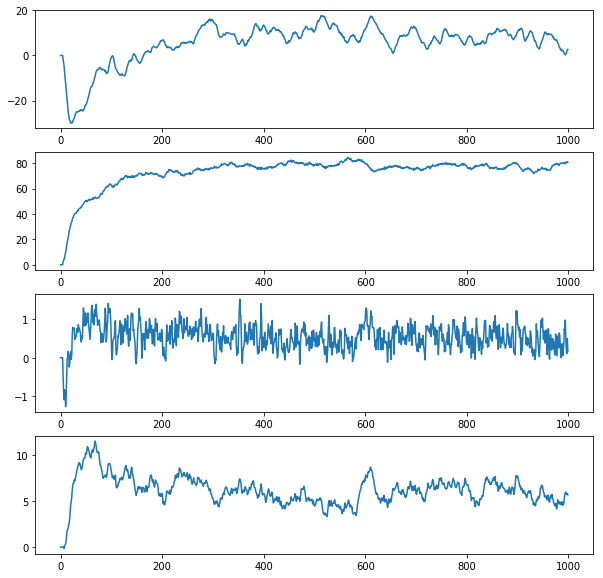

In [6]:
#escolemos o modelo com 5 defasagens
fit5 = model.fit(maxlags=5)
fit5.plotsim()

### Parte 2
**Importe para o R os dados do arquivo “dados_02.csv”. As séries estão agrupadas de 4 em 4, e cada aluno deverá analisar um grupo específico (p.ex., V1 a V4, V5 a V8 etc.), conforme definido em aula.**

**Deverão ser considerados os seguintes possíveis modelos: (i) ARIMA para X1 (identificado pela metodologia Box-Jenkins), (ii) VAR para X1 e X2; (iii) VAR para X1, X2, X3 e X4; (iv) ARMADL para X1 e X2. Em cada caso, o aluno deve buscar a melhor especificação possível para a amostra restrita às primeiras 200 observações.**

**Em seguida, o aluno deve avaliar o desempenho preditivo de cada modelo por meio do
seguinte procedimento: (i) estimar cada modelo usando apenas as primeiras 200
observações; (ii) realizar previsões a partir do modelo estimado para as próximas 20
observações, mantendo a amostra de estimação fixa em T=200; (iii) calcular o EQM de
previsão; (iv) selecionar o modelo com menor EQM. [obs. No caso do modelo
ARMADL, é necessário gerar também previsões de X2, o que pode ser feito a partir de
um modelo ARIMA]**

Selecionei o segundo grupo V5 - V8

In [7]:
#a biblioteca statsmodels espera que as series temporais sejam indexadas por datas, como os dados não possuiam data
#considerei dados diários desde jan/15
data2 = pd.read_csv('dados_02.csv',sep=';', decimal=',', index_col=0, usecols=range(4,9))
data2.index = pd.date_range(start='2015-01-01', periods=len(data2)) 
data2.head()

,V5,V6,V7,V8
2015-01-01,9.155180,10.002280,1.809067,0.951514
2015-01-02,9.127209,9.800345,1.811543,1.164562
2015-01-03,9.264625,9.907205,1.866863,1.326710
2015-01-04,9.280383,9.991321,1.974905,1.458685
2015-01-05,9.173986,9.977733,1.842954,1.431095


In [8]:
#seleciona ordens p e q para o modelo arima AR são linhas e MA são colunas
sm.tsa.arma_order_select_ic(data2['V5'].values, ic=['aic', 'bic', 'hqic'])

{'aic':             0           1           2
 0 -273.420214 -408.329651 -406.698828
 1 -344.703709 -406.699667 -404.700591
 2 -383.086187 -404.706068 -403.448436
 3 -387.579785 -405.544332 -403.632912
 4 -388.339787 -403.736966 -404.601272,
 'aic_min_order': (0, 1),
 'bic':             0           1           2
 0 -266.458936 -397.887734 -392.776272
 1 -334.261792 -392.777111 -387.297396
 2 -369.163631 -387.302874 -382.564602
 3 -370.176591 -384.660498 -379.268440
 4 -367.455954 -379.372493 -376.756161,
 'bic_min_order': (0, 1),
 'hqic':             0           1           2
 0 -270.615327 -404.122321 -401.089054
 1 -340.496379 -401.089893 -397.688374
 2 -377.476413 -397.693851 -395.033776
 3 -380.567569 -397.129672 -393.815809
 4 -379.925127 -393.919862 -393.381725,
 'hqic_min_order': (0, 1)}

In [75]:
#Cria os modelos e faz previsões 20 passos a frente

modelo_arima = sm.tsa.ARIMA(data2.iloc[:200]['V5'],order=(0,1,1), exog=None).fit()
forecast_arima = pd.DataFrame(modelo_arima.forecast(20)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=20))

var_12 = sm.tsa.VAR(data2.iloc[:200,[0,1]])
order = 2

var_12_results = var_12.fit(order)
forecasts_var_12 = pd.DataFrame(var_12_results.forecast_interval(var_12_results.y[-order:],20)[1], columns=data2.columns[0:2], index=pd.date_range(start=data2.index[200], periods=20))

var_1234 = sm.tsa.VAR(data2.iloc[:200])
order = 2

var_1234_results = var_1234.fit(order)
forecast_var_1234 = pd.DataFrame(var_1234_results.forecast_interval(var_1234_results.y[-order:],20)[1], columns=data2.columns, index=pd.date_range(start=data2.index[200], periods=20))

modelo_armadl = sm.tsa.ARMA(data2.iloc[:200]['V5'],order=(0,1), exog=data2.iloc[:200]['V6']).fit()

min_order = sm.tsa.arma_order_select_ic(data2.iloc[:200]['V6'].values, ic='bic')['bic_min_order']
exog_model = sm.tsa.ARMA(data2.iloc[:200]['V6'],order=min_order, exog=None).fit()
exog= exog_model.forecast(20)[0]
forecast_exog = pd.DataFrame(exog, columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=20))

forecast_armadl = pd.DataFrame(modelo_armadl.forecast(20, exog=forecast_exog)[0], columns=[data2.columns[0]], index=pd.date_range(start=data2.index[200], periods=20))

forecasts = pd.concat([data2.iloc[200:220],forecast_arima, forecast_armadl, forecasts_var_12, forecast_var_1234], axis=1, keys=['REAL','ARIMA','ARMADL','VAR_X12','VAR_X1234'])

forecasts.sort_index(axis=1).head().style.set_caption('Resultado das previsões 20 passos a frente.')

In [10]:
#calcula o Erro quadrático médio das previsões 20 passos a frente
mqe_arima = ((forecasts['REAL'] - forecasts['ARIMA'])**2)
mqe_armadl = ((forecasts['REAL'] - forecasts['ARMADL'])**2)
mqe_varx12 = ((forecasts['REAL'] - forecasts['VAR_X12'])**2)
mqe_varx1234 = ((forecasts['REAL'] - forecasts['VAR_X1234'])**2)
mqe = pd.concat([mqe_arima, mqe_armadl, mqe_varx12, mqe_varx1234], axis=1, names=['Modelo', 'Parâmetro'], keys=['ARIMA','ARMADL','VAR_X12','VAR_X1234']).dropna(axis=1).sum()
mqe.to_frame(name='Erro Quadrático Médio - 20 passos').style

In [74]:
#calcula as previsões 1 passo a frente, 20 vezes

sim_data = data2.iloc[:200].copy()

arima_data = sim_data['V5'].copy()
var12_data = sim_data[['V5','V6']].copy()
var1234_data = sim_data.copy()
armadl_data = sim_data['V5'].copy()
exog_data = sim_data['V6'].copy()

for i in range(20):
    modelo_arima = sm.tsa.ARIMA(arima_data,order=(0,1,1), exog=None).fit()
    forecast_arima = pd.Series(modelo_arima.forecast(1)[0], index=[arima_data.index[-1] + pd.Timedelta(days=1)], name='V5')
    arima_data = arima_data.append(forecast_arima)
    
    var_12 = sm.tsa.VAR(var12_data)
    var_12_results = var_12.fit(2)
    forecast_var_12 = pd.DataFrame(var_12_results.forecast_interval(var_12_results.y[-2:],1)[1], columns=['V5','V6'], index=[var12_data.index[-1] + pd.Timedelta(days=1)])
    var12_data = var12_data.append(forecast_var_12)
    
    var_1234 = sm.tsa.VAR(var1234_data)
    var_1234_results = var_1234.fit(2)
    forecast_var_1234 = pd.DataFrame(var_1234_results.forecast_interval(var_1234_results.y[-2:],1)[1], columns=var1234_data.columns, index=[var1234_data.index[-1] +  pd.Timedelta(days=1)])
    var1234_data = var1234_data.append(forecast_var_1234)
    
    exog_model = sm.tsa.ARMA(exog_data.values,order=(0,1)).fit()
    modelo_armadl = sm.tsa.ARMA(armadl_data,order=(0,1), exog=exog_data).fit()
    
    forecast_exog = exog_model.forecast(1)[0]
    exog_data[exog_data.index[-1] + pd.Timedelta(days=1)] = forecast_exog[0]
    
    forecast_armadl = pd.Series(modelo_armadl.forecast(1, exog=forecast_exog)[0], name='V5', index=[armadl_data.index[-1] + pd.Timedelta(days=1)])
    armadl_data = armadl_data.append(forecast_armadl)
    
forecasts1p20 = pd.concat([data2,arima_data, armadl_data, var12_data, var1234_data], axis=1, keys=['REAL','ARIMA','ARMADL','VAR_X12','VAR_X1234']).iloc[200:220]
forecasts1p20.head().style.set_caption('Primeiras 5 previsões realizadas 1 passo de cada vez.')

In [12]:
#calcula o Erro quadrático médio das previsões 20 passos a frente e imprime uma tabela comparativa
mqe_arima = ((forecasts1p20['REAL'] - forecasts1p20['ARIMA'])**2)
mqe_armadl = ((forecasts1p20['REAL'] - forecasts1p20['ARMADL'])**2)
mqe_varx12 = ((forecasts1p20['REAL'] - forecasts1p20['VAR_X12'])**2)
mqe_varx1234 = ((forecasts1p20['REAL'] - forecasts1p20['VAR_X1234'])**2)
mqe_1p20 = pd.concat([mqe_arima, mqe_armadl, mqe_varx12, mqe_varx1234], axis=1, names=['Modelo', 'Parâmetro'], keys=['ARIMA','ARMADL','VAR_X12','VAR_X1234']).dropna(axis=1).sum()
pd.concat([mqe, mqe_1p20], axis=1, keys=['EQM 20 passos 1 vez', 'EQM 1 passo 20 vezes']).style.set_caption('Comparativo EQM')

In [13]:
x = pd.concat([forecasts, forecasts1p20], axis=1, keys=['20 passos 1 vez', '1 passo 20 vezes']).swaplevel(i=-3, j=-2, axis=1).sort_index(axis=1)
x.columns = pd.MultiIndex.from_tuples([(a,'Forecast {} {}'.format(c,b)) for a,b,c in x.columns])

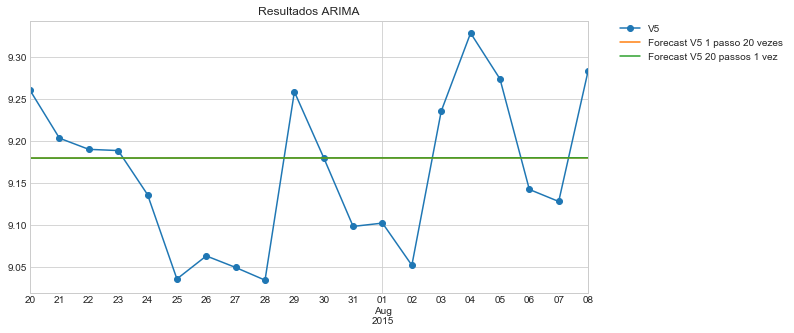

In [65]:
ax = forecasts['REAL']['V5'].to_frame('V5').plot(figsize=(10,5), title='Resultados ARIMA', marker='o')
x['ARIMA'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

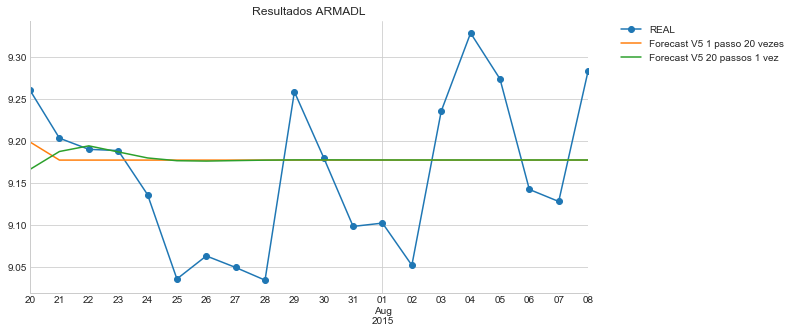

In [72]:
ax = forecasts['REAL']['V5'].to_frame('REAL').plot(figsize=(10,5), title='Resultados ARMADL', marker='o')
x['ARMADL'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.1)
sns.despine()

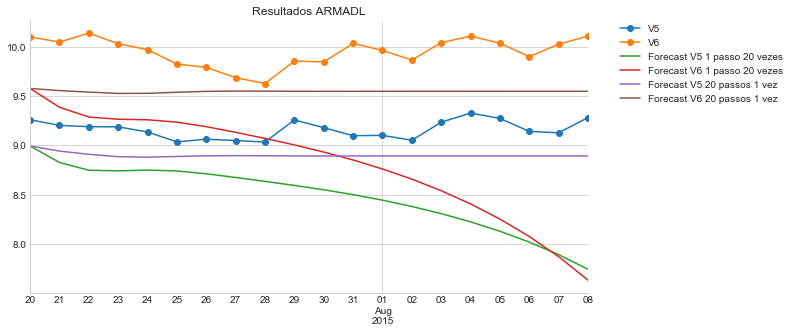

In [71]:
ax = forecasts['REAL'][['V5','V6']].plot(figsize=(10,5), title='Resultados ARMADL', marker='o')
x['VAR_X12'].plot(ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()

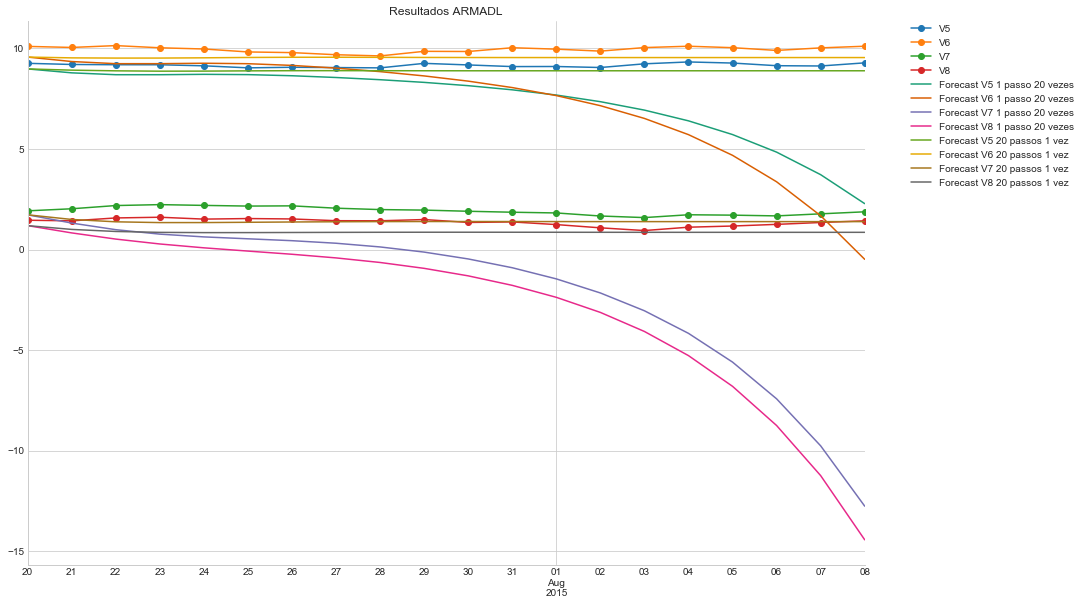

In [70]:
ax = forecasts['REAL'].plot(figsize=(15,10), title='Resultados ARMADL', marker='o')
x['VAR_X1234'].plot(ax=ax, colormap='Dark2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()